# Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item()
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}")
    ```


---

## 3. Finetuning

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)
- [Ejemplos](https://huggingface.co/docs/transformers/v4.45.2/en/notebooks)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**:
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

A continuación sigue una pequeña ayuda:

In [1]:
!pip install --upgrade huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.8/447.8 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.26.3
    Uninstalling huggingface-hub-0.26.3:
      Successfully uninstalled huggingface-hub-0.26.3


In [2]:
!pip install transformers
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
!pip uninstall datasets
!pip install datasets

Found existing installation: datasets 3.2.0
Uninstalling datasets-3.2.0:
  Would remove:
    /usr/local/bin/datasets-cli
    /usr/local/lib/python3.10/dist-packages/datasets-3.2.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/datasets/*
Proceed (Y/n)? y
  Successfully uninstalled datasets-3.2.0
  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
Using cached datasets-3.2.0-py3-none-any.whl (480 kB)


In [5]:
try:
    import transformers
    print("La biblioteca 'transformers' ya está instalada.")
except ImportError:
    print("La biblioteca 'transformers' no está instalada.")

La biblioteca 'transformers' ya está instalada.


In [6]:
print(transformers.__version__)
print(transformers.__file__)

4.46.3
/usr/local/lib/python3.10/dist-packages/transformers/__init__.py


In [7]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
from transformers import AutoImageProcessor, MobileViTV2ForImageClassification

### Eligimos un set de datos y lo traemos

In [8]:
# Voy a usar el dataset Beans (tres clases, dos con enfermedades y una sana) y un modelo MobileVitV2 ya que quiero un modelo y un dataset simples que no me trabe el PC como en el TP 2.

from datasets import load_dataset, DownloadConfig

download_config = DownloadConfig(delete_extracted=True, download_desc=None)
dataset = load_dataset("AI-Lab-Makerere/beans")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.95k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/144M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/18.5M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

In [9]:
print(dataset)
print(dataset['train'].features)
print(dataset['train'][0])
print(dataset['train'].features['labels'].names)


print(f"Tamaño del conjunto de entrenamiento: {len(dataset['train'])}")
print(f"Tamaño del conjunto de validación: {len(dataset['validation'])}")
print(f"Tamaño del conjunto de prueba: {len(dataset['test'])}")

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})
{'image_file_path': Value(dtype='string', id=None), 'image': Image(mode=None, decode=True, id=None), 'labels': ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)}
{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7D120EB69DB0>, 'labels': 0}
['angular_leaf_spot', 'bean_rust', 'healthy']
Tamaño del conjunto de entrenamiento: 1034
Tamaño del conjunto de validación: 133
Tamaño del conjunto de prueba: 12

In [10]:
# Listar nombres de columnas y verificar las rutas
print(dataset['train'].column_names)

# Acceder a la ruta de la primera imagen
print(dataset['train'][0]['image_file_path'])

['image_file_path', 'image', 'labels']
/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg


In [41]:
labels = dataset['train'].features['labels'].names
print(labels)

['angular_leaf_spot', 'bean_rust', 'healthy']


In [18]:
train_dataset = dataset['train']
test_dataset = dataset['test']

In [19]:
torch.set_float32_matmul_precision("medium")

### Eligimos un modelo pre entrenado y lo traemos

Uso el modelo MobileViT V2

In [12]:
processor = AutoImageProcessor.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256")
model = MobileViTV2ForImageClassification.from_pretrained('apple/mobilevitv2-1.0-imagenet1k-256')

# Última capa con 3 clases (3 clases de beans)
model.config.num_labels = 3
model.config.labels = labels

model.config.id2label = {str(i): label for i,label in enumerate(labels)}
model.config.label2id = {label:str(i) for i,label in enumerate(labels)}

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/19.8M [00:00<?, ?B/s]

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(device)

cuda


In [14]:
model = MobileViTV2ForImageClassification.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256", config=model.config, ignore_mismatched_sizes=True)
model.to(device)

Some weights of MobileViTV2ForImageClassification were not initialized from the model checkpoint at apple/mobilevitv2-1.0-imagenet1k-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 512]) in the checkpoint and torch.Size([3, 512]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


MobileViTV2ForImageClassification(
  (mobilevitv2): MobileViTV2Model(
    (conv_stem): MobileViTV2ConvLayer(
      (convolution): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (normalization): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): SiLU()
    )
    (encoder): MobileViTV2Encoder(
      (layer): ModuleList(
        (0): MobileViTV2MobileNetLayer(
          (layer): ModuleList(
            (0): MobileViTV2InvertedResidual(
              (expand_1x1): MobileViTV2ConvLayer(
                (convolution): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (activation): SiLU()
              )
              (conv_3x3): MobileViTV2ConvLayer(
                (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
 

## Preprocesamiento de los datos

In [15]:
from torchvision import transforms
from PIL import Image

In [20]:
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((224, 224)),         # 224x224 porque MobileVitV2 usa esa resolución
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [22]:
def transform(example):

    inputs = data_transforms(example['image'])
    example['pixel_values'] = inputs
    example['label'] = example['labels']
    return example

In [23]:
train_dataset = train_dataset.map(transform, remove_columns=["image","labels","image_file_path"])
test_dataset = test_dataset.map(transform, remove_columns=["image","labels","image_file_path"])

Map:   0%|          | 0/1034 [00:00<?, ? examples/s]

Map:   0%|          | 0/128 [00:00<?, ? examples/s]

In [24]:
train_dataset.set_format(type='torch', columns=['pixel_values', 'label'])
test_dataset.set_format(type='torch', columns=['pixel_values', 'label'])

In [27]:
train_dataset

Dataset({
    features: ['pixel_values', 'label'],
    num_rows: 1034
})

In [25]:
test_dataset

Dataset({
    features: ['pixel_values', 'label'],
    num_rows: 128
})

## FINE TUNING

In [28]:
from transformers import Trainer, TrainingArguments
import os
os.environ["WANDB_DISABLED"] = "true"

In [29]:
training_args = TrainingArguments(
    output_dir="./vit-finetuned",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=20,
    weight_decay=0.01,
    logging_dir='./logs',
    log_level = 'info',
    fp16 = True,
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = np.mean(preds == labels)
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    #compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using auto half precision backend
***** Running training *****
  Num examples = 1,034
  Num Epochs = 20
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 340
  Number of trainable parameters = 4,390,380


Epoch,Training Loss,Validation Loss
1,No log,1.081657
2,No log,1.059826
3,No log,1.036282
4,No log,1.013893
5,No log,0.987553
6,No log,0.963676
7,No log,0.936802
8,No log,0.912987
9,No log,0.888329
10,No log,0.863909



***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

***** Running Evaluation *****
  Num examples = 128
  Batch size = 64

*****

TrainOutput(global_step=340, training_loss=0.8588553035960478, metrics={'train_runtime': 329.7888, 'train_samples_per_second': 62.707, 'train_steps_per_second': 1.031, 'total_flos': 8.20013849690112e+16, 'train_loss': 0.8588553035960478, 'epoch': 20.0})

In [30]:
eval_results = trainer.evaluate()
print(eval_results)


***** Running Evaluation *****
  Num examples = 128
  Batch size = 64


{'eval_loss': 0.7456398010253906, 'eval_runtime': 1.5708, 'eval_samples_per_second': 81.489, 'eval_steps_per_second': 1.273, 'epoch': 20.0}


## Evaluación del modelo

In [34]:
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score

test_loader = DataLoader(test_dataset, batch_size=32)

model.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cuda'))
        predictions = torch.argmax(outputs.logits, dim=-1).to('cpu').numpy()
        labels = batch['label'].to('cpu').numpy()

        all_labels.extend(labels)
        all_predictions.extend(predictions)

accuracy = (np.array(all_predictions) == np.array(all_labels)).mean()
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")


Test Accuracy: 82.81%
Precision: 83.04%
Recall: 82.81%
F1 Score: 82.90%


In [35]:
# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cuda'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['label']).sum().item()
        total += batch['label'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 82.81%


In [ ]:
#Los dos códigos coinciden


***** Running Prediction *****
  Num examples = 128
  Batch size = 64


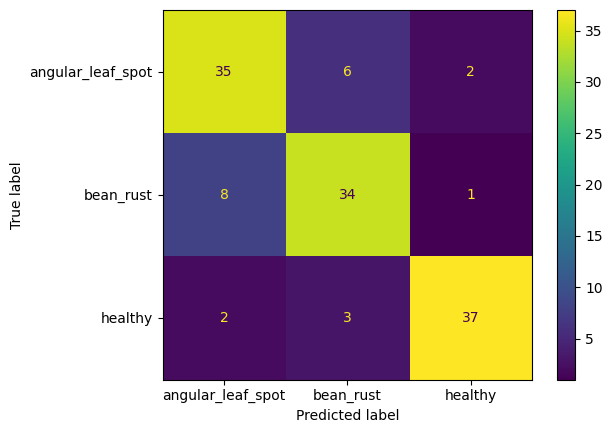

In [42]:
#Matriz de confusión

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

outputs = trainer.predict(test_dataset)

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

y_pred_filtered = np.where(y_pred < len(labels), y_pred, -1)

cm = confusion_matrix(y_true, y_pred_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

## CONCLUSIONES

El modelo MobileViTV2 se eligió debido a su eficiencia y capacidad de compresión, lo que lo hace adecuado para dispositivos con recursos limitados, manteniendo al mismo tiempo un buen rendimiento en tareas de clasificación.

# Métricas de Desempeño
Accuracy: 82.81%
Significa que el modelo clasifica correctamente alrededor del 83% de las imágenes del conjunto de prueba. Esto sugiere que el modelo captura eficazmente las características visuales más importantes presentes en el dataset, incluso ante variaciones de las imágenes (dado por el DA)

Precision: 83.04%
La precisión mide la proporción de predicciones positivas correctas respecto al total de predicciones positivas realizadas. Con un valor del 83.04%, el modelo es confiable y evita falsos positivos.

Recall: 82.81%
Mide qué tan bien el modelo captura todas las instancias positivas. Con un 82.81%, el modelo logra identificar la mayoría de las clases presentes en el dataset, aunque existe un % de instancias que no se capturan.

F1 Score: 82.90%
Es la media entre precision y recall y es del 82.90%. Este valor indica un equilibrio, garantizando que el modelo mantiene un compromiso entre evitar falsos positivos y no perder demasiadas predicciones relevantes.

# Data Augmentation

Al implementar el Data Augmentation, se realizaron transformaciones a las imágenes del dataset con el objetivo de aumentar la diversidad y robustez del conjunto de datos, mejorando así la capacidad del modelo para generalizar y evitar el overfitting.

# Conclusiones finales

El modelo demostró ser una elección sólida para clasificar las imágenes del dataset beans debido a su combinación de velocidad y métricas relativamente buenas. Esto resalta el potencial de usar este tipo de modelos en aplicaciones prácticas en dispositivos con recursos limitados, lo que es fundamental en escenarios agrícolas reales donde la identificación rápida es clave (lo vimos en VxC II con DeepAgro)